In [186]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
import statistics
import seaborn as sns; sns.set(style="whitegrid")
import math
%run Cointegration.py
%matplotlib inline

In [255]:
def regressao_multipla(data, y_symbol, x_symbol, period):
    numbers = np.arange(1, period+1)
    pairs = pd.DataFrame()
    pairs[y_symbol] = data[y_symbol]
    pairs[x_symbol] = data[x_symbol]

    pairs = pairs[len(data)-period:]
    pairs['Temp'] = period - numbers + 1
    
    y = pairs[y_symbol]
    x = pairs[[x_symbol, 'Temp']]
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    return {"CoefTemp":model.params['Temp'], 
            "CoefAng":model.params[x_symbol],
            "CoefLin":model.params['const']}

In [256]:
data = pd.read_csv('datasets/data.csv', index_col=0)
#data = data[::-1]
#data = data[:140]

In [257]:
data.drop(['30/06/2020'], inplace=True)

In [258]:
period = 140
numbers = np.arange(1, period+1)
tempo = period - numbers + 1
data_limmit = data[len(data)-period:]

data_limmit = data_limmit[['BBAS3', 'CSAN3']]
data_limmit = data_limmit[::-1]
data_limmit

,BBAS3,CSAN3
Data,,
29/06/2020,33.44,70.18
26/06/2020,31.82,68.69
25/06/2020,33.01,70.16
24/06/2020,32.22,68.79
23/06/2020,33.53,68.76
...,...,...
09/12/2019,48.62,65.86
06/12/2019,48.47,66.54
05/12/2019,48.67,65.65


In [260]:
result = regressao_multipla(data_limmit, 'BBAS3', 'CSAN3', 140)
result

{'CoefTemp': -0.1463314727157582,
 'CoefAng': 0.6121081780727566,
 'CoefLin': 8.173469578706111}

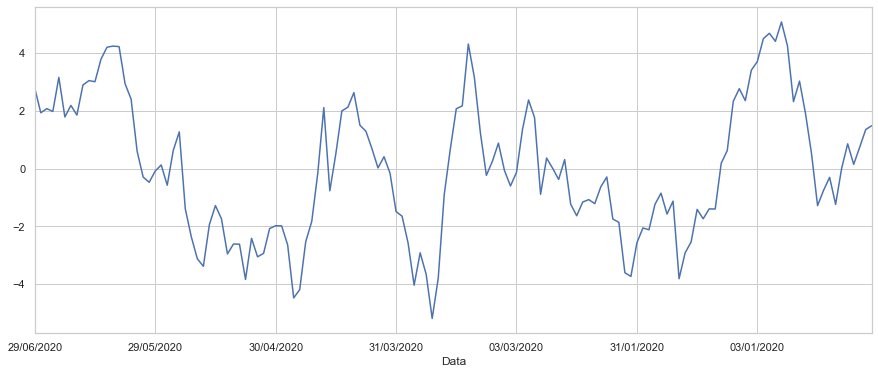

In [263]:
res = data_limmit['BBAS3']-result['CoefAng']*data_limmit['CSAN3']-tempo*result['CoefTemp']-result['CoefLin']
res.plot(figsize=(15,6))

In [249]:
numbers = np.arange(1, len(data_limmit)+1)
data_limmit['Du'] = 140 - numbers + 1

y = data_limmit['BBAS3']
x = data_limmit[['CSAN3', 'Du']]

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print('Coef.Temp: {}'.format(model.params['Du']))
print('Coef.Ang: {}'.format(model.params['CSAN3']))
print('Coef.Linear: {}'.format(model.params['const']))
#print(model.summary())

Coef.Temp: -0.1463314727157582
Coef.Ang: 0.6121081780727566
Coef.Linear: 8.173469578706111


In [247]:
coef_temp = -0.1463
coef_ang = 0.612
coef_linear = 8.17

#data['resid'] = data['BBAS3']-coef_ang*data['CSAN3']-data['Du']*coef_temp-coef_linear
resid = data_limmit['BBAS3']-coef_ang*data_limmit['CSAN3']-data_limmit['Du']*coef_temp-coef_linear
resid = resid[::-1]

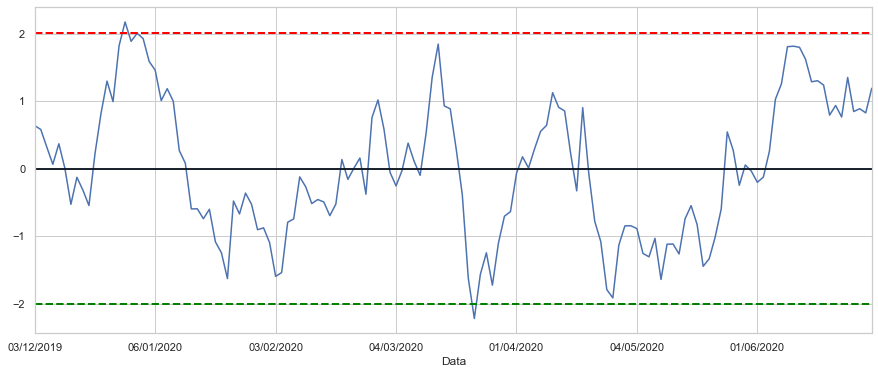

In [248]:
result = zscore(resid)
std = statistics.stdev(result)
result.plot(figsize=(15,6))
plt.axhline(result.mean())

plt.axhline(0, color='black',label='mean') # Add the mean of residual
plt.axhline(2*std, color='red', linestyle='--', linewidth=2)
plt.axhline(-2*std, color='green', linestyle='--', linewidth=2)

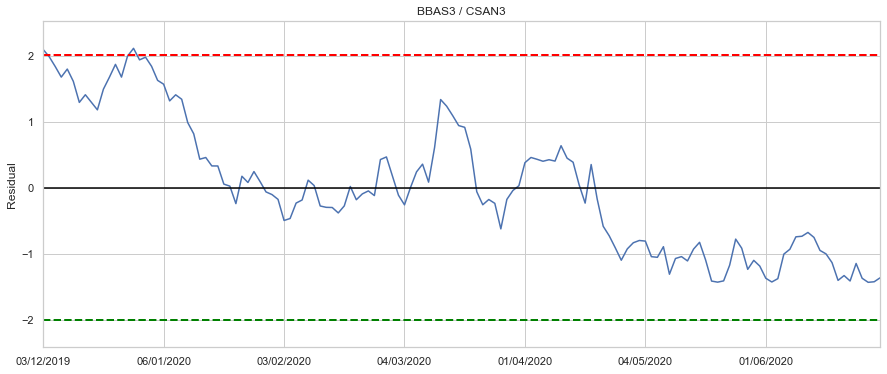

In [74]:
show(data, 'BBAS3', 'CSAN3', 140)

In [86]:
y = df['ABEV3'][::-1][:16]
x = df['AZUL4'][::-1][:16]

In [87]:
model = model_ols(y, x)
model.params

const    12.331152
AZUL4     0.070813
dtype: float64